# package_LAB2

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_LAB2
from package_LAB2 import SelectPath_RT,Delay_RT,Leadlag

from importlib import reload
package_LAB2=reload(package_LAB2)

## Leadlag()

In [14]:
help(Leadlag)

Help on function Leadlag in module package_LAB2:

Leadlag(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "FO_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :T: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0, 100)

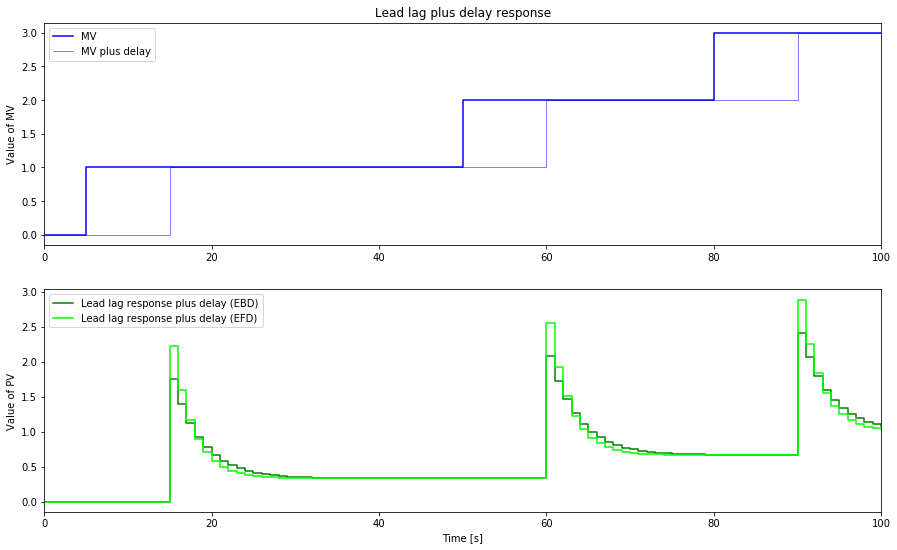

In [15]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 20
Tlag=3
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    Leadlag(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    Leadlag(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    #Leadlag(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead lag response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead lag response plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    